In [1]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np

In [2]:
data = sns.load_dataset("tips")
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
features = data[['total_bill']]
tip = data['tip']

In [14]:
from sklearn import linear_model

f = linear_model.LinearRegression(fit_intercept=False)
f.fit(features.values, tip)

LinearRegression(fit_intercept=False)

In [15]:
f.predict([[100]])

array([14.37318953])

In [16]:
f.predict([[74.12]])

array([10.65340808])

In [19]:
data['prediction'] = f.predict(features.values)
data

,total_bill,tip,sex,smoker,day,time,size,prediction
0,16.99,1.01,Female,No,Sun,Dinner,2,2.442005
1,10.34,1.66,Male,No,Sun,Dinner,3,1.486188
2,21.01,3.50,Male,No,Sun,Dinner,3,3.019807
3,23.68,3.31,Male,No,Sun,Dinner,2,3.403571
4,24.59,3.61,Female,No,Sun,Dinner,4,3.534367
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,4.172537
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.906633
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.258402
242,17.82,1.75,Male,No,Sat,Dinner,2,2.561302


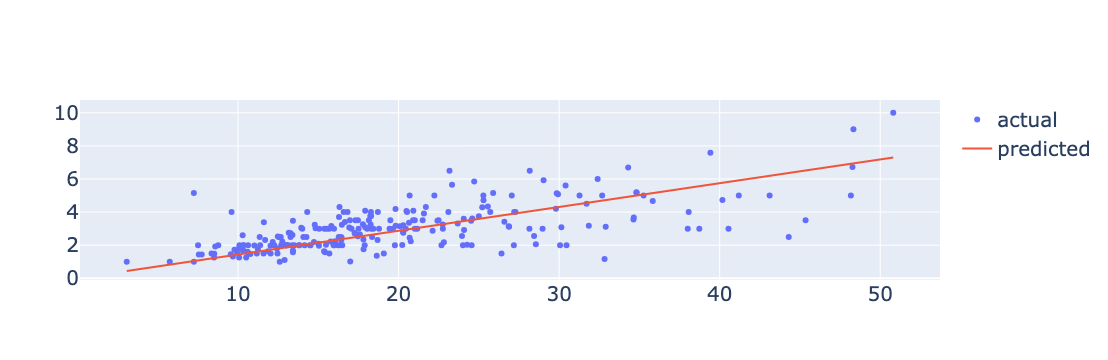

In [20]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['total_bill'], y=data['tip'], mode='markers', name='actual'))
fig.add_trace(go.Scatter(x=data['total_bill'], y=data['prediction'], mode='lines', name='predicted'))
fig.update_layout(font_size=20)

In [22]:
(f.coef_, f.intercept_)

(array([0.1437319]), 0.0)

In [23]:
f_w_int = linear_model.LinearRegression(fit_intercept=True)
f_w_int.fit(features.values, tip)

LinearRegression()

In [26]:
f_w_int.predict([[100], [0]])

array([11.42272135,  0.92026961])

In [27]:
f.predict([[100], [0]])

array([14.37318953,  0.        ])

In [28]:
data['prediction_with_intercept'] = f_w_int.predict(data[['total_bill']].values)

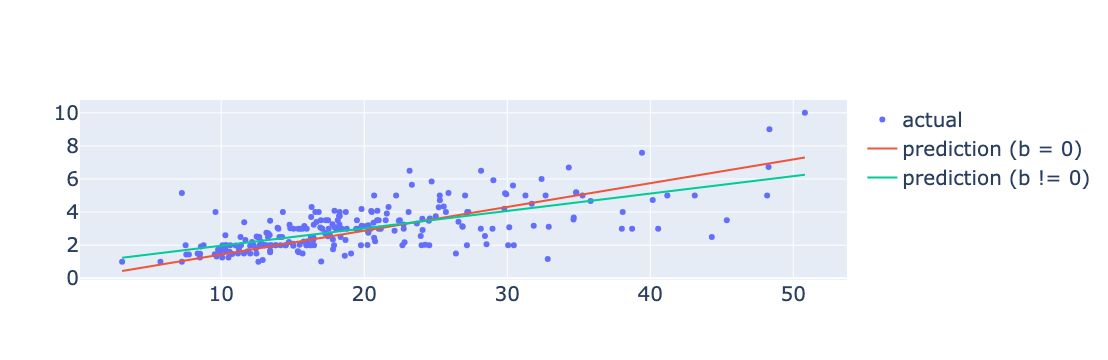

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['total_bill'], y=data['tip'], mode='markers', name='actual'))
fig.add_trace(go.Scatter(x=data['total_bill'], y=data['prediction'], mode='lines', name='prediction (b = 0)'))
fig.add_trace(go.Scatter(x=data['total_bill'], y=data['prediction_with_intercept'], mode='lines', name='prediction (b != 0)'))
fig.update_layout(font_size=20)